=== HASIL FUZZY TSUKAMOTO ===
Nilai Subsidi    : 3.55 juta rupiah per hektar


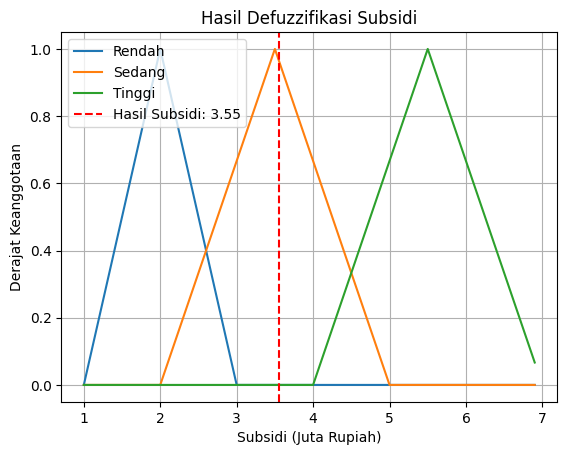

In [20]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# 1. Definisi Semesta dan Fungsi Keanggotaan
luas_lahan = np.arange(0, 10.1, 0.1)
produksi_padi = np.arange(0, 10.1, 0.1)
subsidi = np.arange(1, 7.1, 0.1)

# Fungsi Keanggotaan Luas Lahan
luas_rendah = fuzz.trimf(luas_lahan, [0, 0, 5])
luas_sedang = fuzz.trimf(luas_lahan, [3, 5, 7])
luas_tinggi = fuzz.trimf(luas_lahan, [5, 10, 10])

# Fungsi Keanggotaan Produksi Padi
prod_rendah = fuzz.trimf(produksi_padi, [0, 0, 5])
prod_sedang = fuzz.trimf(produksi_padi, [3, 5, 7])
prod_tinggi = fuzz.trimf(produksi_padi, [5, 10, 10])

# 2. Input Data
luas_input = 3.2
produksi_input = 5

rules = [
    {'luas': 0, 'produksi': 0, 'alpha': 0, 'z': 5.5},  
    {'luas': 0, 'produksi': 0.67, 'alpha': 0, 'z': 3.85},
    {'luas': 0, 'produksi': 0, 'alpha': 0, 'z': 2.5},  
    {'luas': 0.64, 'produksi': 0, 'alpha': 0, 'z': 5.5},  
    {'luas': 0.64, 'produksi': 0.67, 'alpha': 0.64, 'z': 3.77},
    {'luas': 0.64, 'produksi': 0, 'alpha': 0, 'z': 2.5},  
    {'luas': 0.133, 'produksi': 0, 'alpha': 0, 'z': 3.74},
    {'luas': 0.133, 'produksi': 0.67, 'alpha': 0.133, 'z': 2.5},  
    {'luas': 0.133, 'produksi': 0, 'alpha': 0, 'z': 2.5},  
]

# 3. Defuzzifikasi Tsukamoto
alpha_values = np.array([r['alpha'] for r in rules])
z_values = np.array([r['z'] for r in rules])

# Perhitungan nilai defuzzifikasi dengan metode Tsukamoto
hasil_subsidi = sum(alpha_values * z_values) / sum(alpha_values)

# Output hasil
print(f'=== HASIL FUZZY TSUKAMOTO ===')
print(f'Nilai Subsidi    : {hasil_subsidi:.2f} juta rupiah per hektar')

# 4. Visualisasi hasil keputusan
subsidi_range = np.arange(1, 7, 0.1)
subsidi_mf_rendah = fuzz.trimf(subsidi_range, [1, 2, 3])
subsidi_mf_sedang = fuzz.trimf(subsidi_range, [2, 3.5, 5])
subsidi_mf_tinggi = fuzz.trimf(subsidi_range, [4, 5.5, 7])

plt.figure()
plt.plot(subsidi_range, subsidi_mf_rendah, label='Rendah')
plt.plot(subsidi_range, subsidi_mf_sedang, label='Sedang')
plt.plot(subsidi_range, subsidi_mf_tinggi, label='Tinggi')
plt.axvline(hasil_subsidi, color='r', linestyle='--', label=f'Hasil Subsidi: {hasil_subsidi:.2f}')
plt.title('Hasil Defuzzifikasi Subsidi')
plt.xlabel('Subsidi (Juta Rupiah)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid()
plt.show()
